In [4]:
#imports
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pydot

In [5]:
#loading  the MNIST Dataset
(x_train,y_train),(x_test,y_test) = load_data()

#reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
                           x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],
                           x_test.shape[2],1))

11490434/11490434 [==============================] - 24s 2us/step


In [6]:
#Normalizing the values of pixels of images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

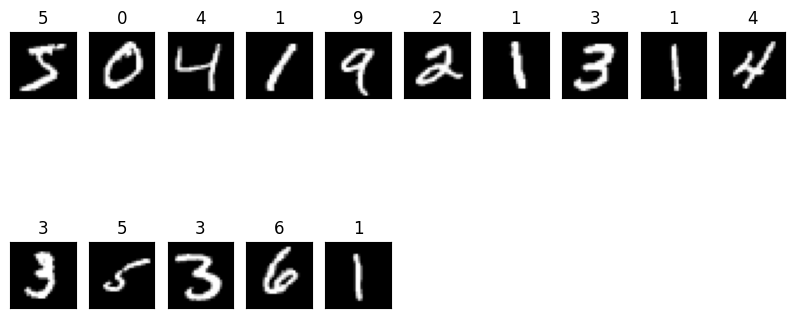

In [7]:
fig = plt.figure(figsize=(10,5))
for i in range(15):
    ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap='gray')
    ax.set_title(y_train[i])

In [8]:
#determine the shape of the input images
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

In [9]:
#defining the model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x = model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 23s - loss: 1.4047 - accuracy: 0.8767 - val_loss: 0.0835 - val_accuracy: 0.9730 - 23s/epoch - 54ms/step
Epoch 2/10
422/422 - 20s - loss: 0.1605 - accuracy: 0.9518 - val_loss: 0.0563 - val_accuracy: 0.9832 - 20s/epoch - 48ms/step
Epoch 3/10
422/422 - 20s - loss: 0.1155 - accuracy: 0.9650 - val_loss: 0.0492 - val_accuracy: 0.9860 - 20s/epoch - 48ms/step
Epoch 4/10
422/422 - 21s - loss: 0.0904 - accuracy: 0.9720 - val_loss: 0.0446 - val_accuracy: 0.9873 - 21s/epoch - 49ms/step
Epoch 5/10
422/422 - 20s - loss: 0.0812 - accuracy: 0.9750 - val_loss: 0.0417 - val_accuracy: 0.9887 - 20s/epoch - 48ms/step
Epoch 6/10
422/422 - 20s - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.0352 - val_accuracy: 0.9895 - 20s/epoch - 48ms/step
Epoch 7/10
422/422 - 20s - loss: 0.0586 - accuracy: 0.9809 - val_loss: 0.0325 - val_accuracy: 0.9908 - 20s/epoch - 48ms/step
Epoch 8/10
422/422 - 20s - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0341 - val_accuracy: 0.9895 - 20s/epoch - 48ms/step


In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.65999817848206
